# Federico Ariton
# Higher Diploma in Science in Data Analytics for Business
# CA 1
# Student Number:sba2209

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
bank_data = pd.read_csv("bank-dataset.csv" , sep = ';')

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Basic statistical summary for numerical columns
numerical_summary = bank_data.describe()

# Count of unique values for categorical columns
categorical_summary = bank_data.select_dtypes(include=['object']).nunique()

numerical_summary, categorical_summary


(               age      duration      campaign         pdays      previous  \
 count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
 mean      40.02406    258.285010      2.567593    962.475454      0.172963   
 std       10.42125    259.279249      2.770014    186.910907      0.494901   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
 mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
 std        1.570960        0.578840     

In [6]:
# Check for missing values in the dataset
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bank_data['pdays']

0        999
1        999
2        999
3        999
4        999
        ... 
41183    999
41184    999
41185    999
41186    999
41187    999
Name: pdays, Length: 41188, dtype: int64

In [11]:
# Handling special values in 'pdays'
bank_data['pdays'] = bank_data['pdays'].replace(999, -1)

# EDA

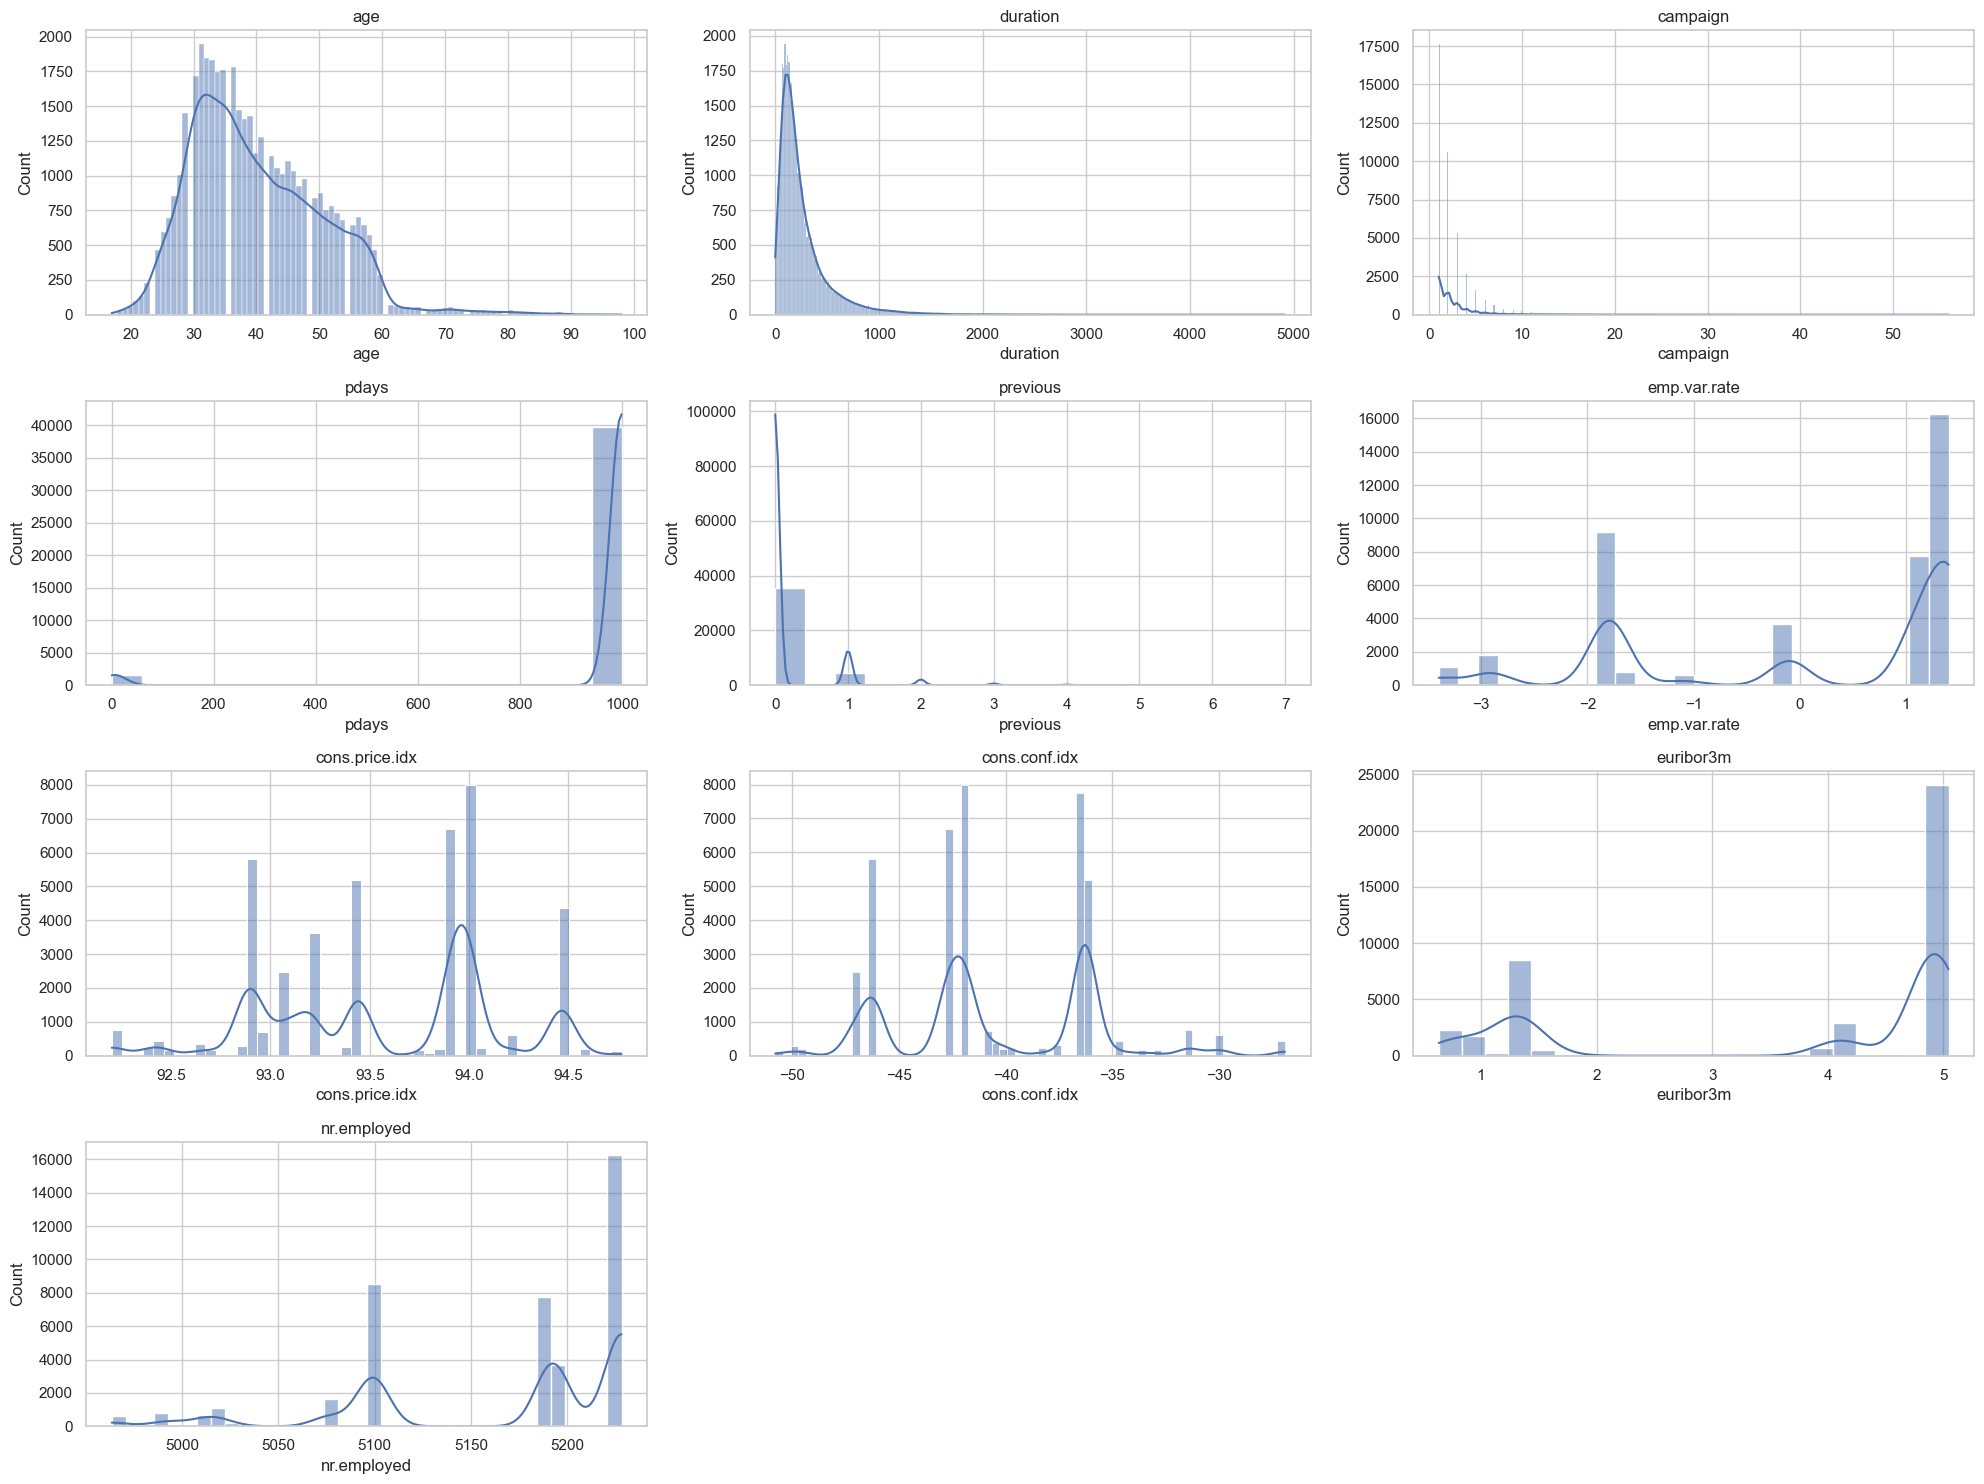

In [7]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Selecting numerical columns for histograms
numerical_columns = bank_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting histograms for numerical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i + 1)
    sns.histplot(bank_data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


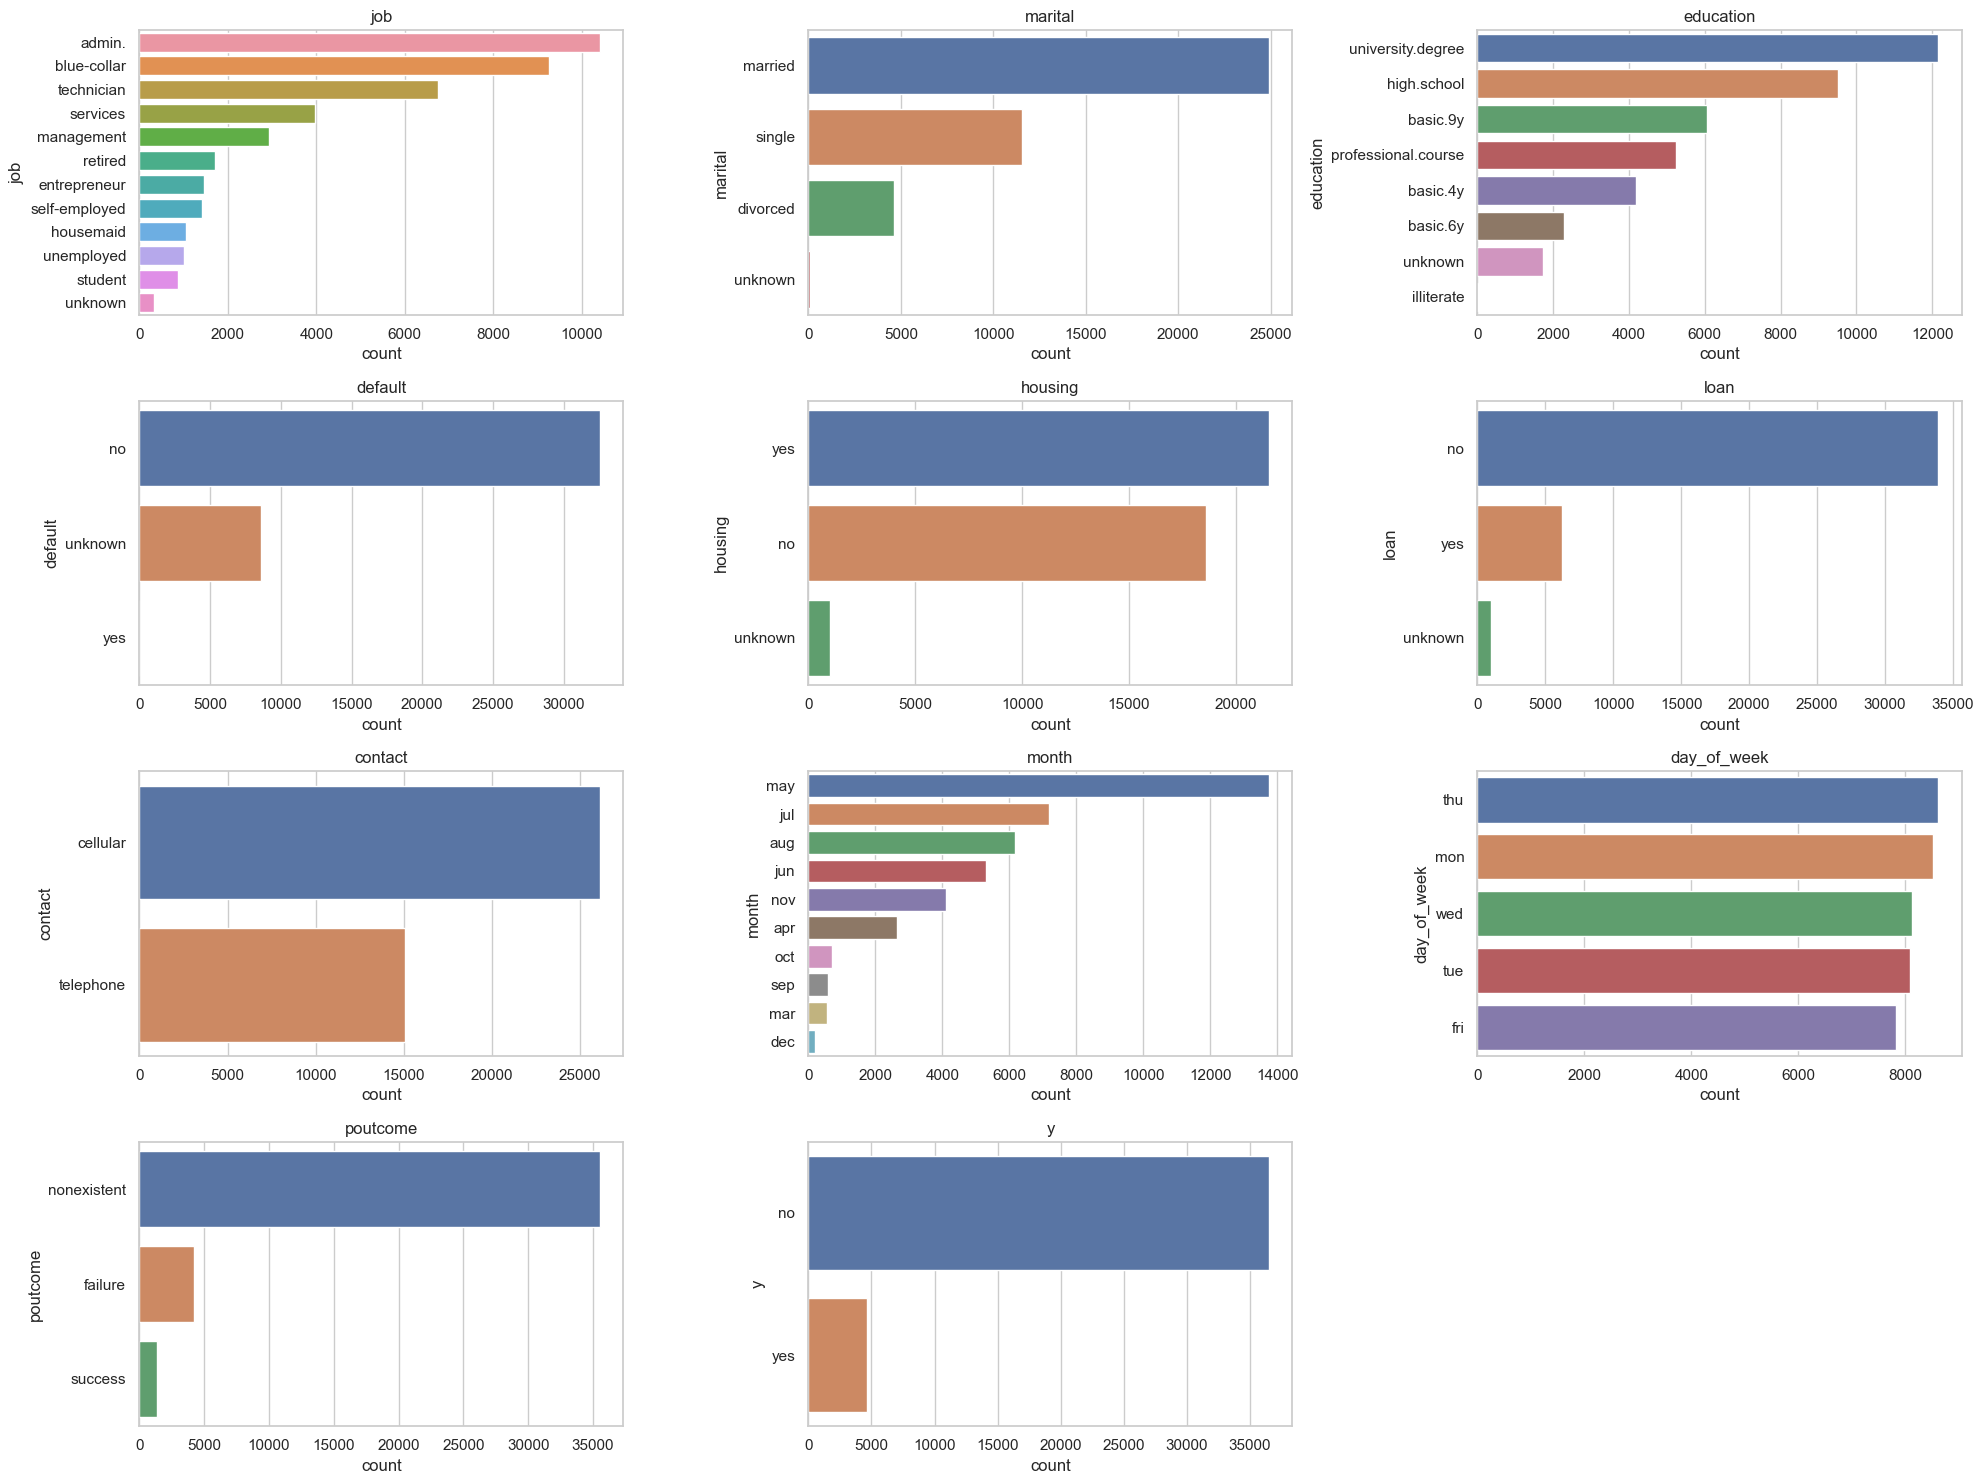

In [8]:
# Selecting categorical columns for bar charts
categorical_columns = bank_data.select_dtypes(include=['object']).columns

# Plotting bar charts for categorical columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_columns):
    plt.subplot(4, 3, i + 1)
    sns.countplot(y=col, data=bank_data, order = bank_data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

plt.show()


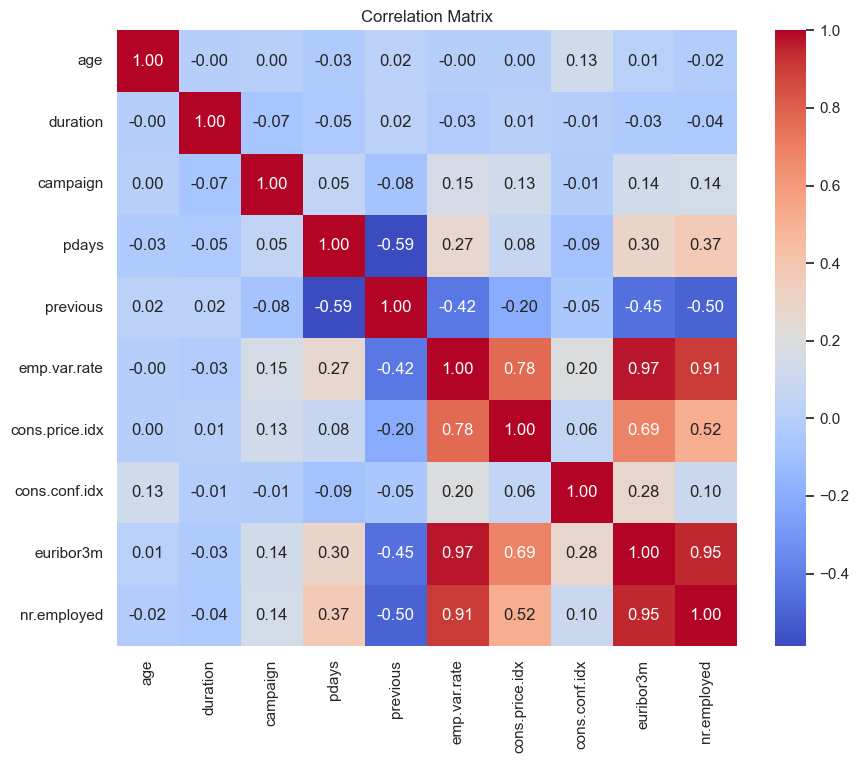

In [9]:
# Correlation matrix for numerical variables
correlation_matrix = bank_data[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Splitting the dataset

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = bank_data.drop('y', axis=1)
y = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Encode target variable

# Scaling the dataset

In [13]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Creating transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [14]:
# Applying the transformations to the dataset
X_transformed = preprocessor.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 63), (8238, 63), (32950,), (8238,))